# Voice Classification

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("data/voice.csv")

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [17]:
x = data.drop("label", axis=1)
y = np.array([1 if i == "male" else 0 for i in data["label"]])

In [18]:
x.shape, y.shape

((3168, 20), (3168,))

In [20]:
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.2, shuffle=True)

In [22]:
train_data.shape, train_labels.shape

((2534, 20), (2534,))

## Helper functions

In [156]:
def train_model(model, verbose=True):
    model.fit(train_data, train_labels)
    predicted = model.predict(test_data)
    acc = metrics.accuracy_score(test_labels, predicted)
    if verbose:
        print("Accuracy:", acc)
        cf = metrics.confusion_matrix(test_labels, predicted)
        print("Classification Report:\n")
        print(metrics.classification_report(test_labels, predicted))
        print("Confusion matrix")
        sns.heatmap(cf, annot=True)
    return acc

records = {}

## Decision Tree Classifier

Accuracy: 0.9700315457413249
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       303
           1       0.98      0.96      0.97       331

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Confusion matrix


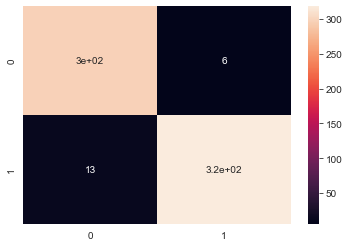

In [161]:
model_1 = DecisionTreeClassifier(criterion="entropy")
model_1_acc = train_model(model_1)

records["Decision Tree Classifier"] = model_1_acc

##  Random Forest Classifier

Accuracy: 0.9716088328075709
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       303
           1       0.98      0.96      0.97       331

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Confusion matrix


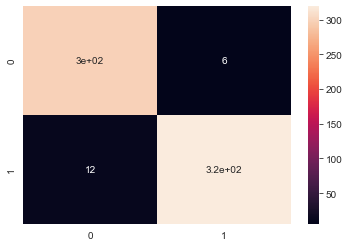

In [162]:
model_2 = RandomForestClassifier()
model_2_acc = train_model(model_2)
records["Random Forest Classifier"] = model_2_acc

## KNN Classifier

Accuracy: 0.7208201892744479
Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       303
           1       0.74      0.72      0.73       331

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634

Confusion matrix


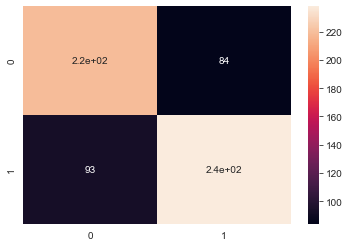

In [163]:
best_acc = 0.0
nn = -1
for i in range(1, 100):
    model_3 = KNeighborsClassifier(n_neighbors=i)
    val = train_model(model_3, verbose=False)
    if best_acc < val:
        best_acc = val
        nn = i
model_3_acc = train_model(KNeighborsClassifier(n_neighbors=nn))

records["KNN Classifier"] = model_3_acc

## Logistic Regression

Accuracy: 0.9022082018927445
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       303
           1       0.86      0.97      0.91       331

    accuracy                           0.90       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634

Confusion matrix


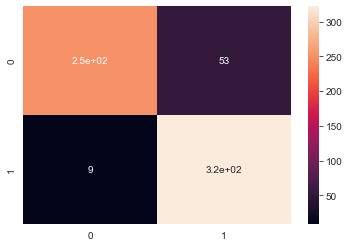

In [164]:
model_4 = LogisticRegression()
model_4_acc = train_model(model_4)

records["Logistic Regression"] = model_4_acc

##  SVM Classifier

Accuracy: 0.9716088328075709
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       303
           1       0.98      0.96      0.97       331

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Confusion matrix


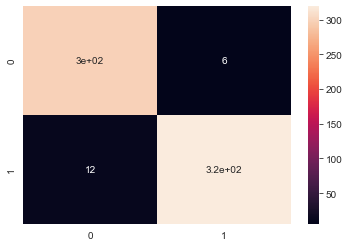

In [165]:
model_5 = make_pipeline(StandardScaler(), SVC())
model_5_acc = train_model(model_5)

records["SVM Classifier"] = model_5_acc

In [166]:
resulted_acc = pd.DataFrame({"Model": records.keys(), "Accuracy": records.values()}, [i for i in range(len(records))])
resulted_acc

,Model,Accuracy
0,Decision Tree Classifier,0.970032
1,Random Forest Classifier,0.971609
2,KNN Classifier,0.720820
3,Logistic Regression,0.902208
4,SVM Classifier,0.971609


In [168]:
print("Best Model {} with Accuracy: {}%".format(max(resulted_acc.Model), max(resulted_acc.Accuracy) * 100))

Best Model SVM Classifier with Accuracy: 97.16088328075709%
